In [1]:
# First need to import dataset from Github
# Import needed libraries to get data from URL and load into Pandas DF
import os
import tarfile
import urllib
import pandas as pd

# Define url and OS path that I want to save csv data under
DATA_URL = "https://raw.githubusercontent.com/JacobBRodriguez/SJSU/master/Fall%202020/DataSets/heart-train.csv"
DATA_URL_TEST = "https://raw.githubusercontent.com/JacobBRodriguez/SJSU/master/Fall%202020/DataSets/heart-test.csv"
DATA_URL_WHOLE = "https://raw.githubusercontent.com/JacobBRodriguez/SJSU/master/Fall%202020/DataSets/heart-complete.csv"
DATA_PATH = os.path.join("/Users/Do-While/Desktop/SJSU/Classes/SJSU/Fall 2020", "DataSets")

# Function to get data from URL and return it as Pandas dataframe
def fetch_and_load_from_url(data_url, data_path, txt_file_name):
    
    # If no data path exists, create directory
    if not os.path.isdir(data_path):
        os.makedirs(data_path)
    # create text document path under OS path
    txt_path = os.path.join(data_path, txt_file_name)
    # Using URL, request data and return to created path
    urllib.request.urlretrieve(data_url, txt_path)
    # Read in text file, convert csv to pandas df and return upon close of file
    with open(txt_path, "r") as file:
        return pd.read_csv(file)

# Creating 3 separate dataframes
heart_train_df = fetch_and_load_from_url(DATA_URL, DATA_PATH, "heart_train.txt")
heart_test_df = fetch_and_load_from_url(DATA_URL_TEST, DATA_PATH, "heart_test.txt")
heart_complete_df = fetch_and_load_from_url(DATA_URL_WHOLE, DATA_PATH, "heart_complete.txt")


In [2]:
heart_complete_df

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


### 1. Identify dataset columns into categories

In [3]:
# Using df.dypes to get an idea
print(heart_train_df.dtypes," \n")
print(heart_test_df.dtypes)
# Categorical
# Nominal columns = [famhist, chd]
# Ordinal = []
# 
# Continuous
# Interval = []
# Ratio = [sbp, ldl, adiposity, alcohol, tobacco, obesity, age, typea]

sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist       object
typea          int64
obesity      float64
alcohol      float64
age            int64
chd            int64
dtype: object  

ID             int64
sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist       object
typea          int64
obesity      float64
alcohol      float64
age            int64
dtype: object


### 2. Use df.info and df.describe to get insights

In [4]:
print(heart_train_df.info())
print(heart_train_df.describe())

print(heart_test_df.info())
print(heart_test_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        412 non-null    int64  
 1   tobacco    412 non-null    float64
 2   ldl        412 non-null    float64
 3   adiposity  412 non-null    float64
 4   famhist    412 non-null    object 
 5   typea      412 non-null    int64  
 6   obesity    412 non-null    float64
 7   alcohol    412 non-null    float64
 8   age        412 non-null    int64  
 9   chd        412 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 32.3+ KB
None
              sbp     tobacco         ldl   adiposity       typea     obesity  \
count  412.000000  412.000000  412.000000  412.000000  412.000000  412.000000   
mean   139.240291    3.666262    4.589539   25.151214   52.135922   25.802112   
std     20.451903    4.518501    1.883744    7.740794    9.592727    4.081745   
min    101.000000    0.

### 3. Find number of null values for each column

In [5]:
# Checking each column to see if null and getting the sum of null values in the rows (axis=0)
print(heart_train_df.isnull().sum(axis=0))
print(heart_test_df.isnull().sum(axis=0))

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64
ID           0
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
dtype: int64


### 4. Know about the patients

##### A) Find the oldest person

In [6]:

# Using max() function on 'age' column
print("Oldest person age: ", heart_train_df["age"].max())

Oldest person age:  64


##### B) Find the youngest person

In [7]:

# Using min() function on 'age' column
print("Youngest person age: ", heart_train_df["age"].min())

Youngest person age:  15


##### C) Find the average age of the group

In [8]:

# Using mean() function on 'age' column
print("Average age of group: ", heart_train_df["age"].mean())

Average age of group:  42.68689320388349


###### D) Find the median age of the group

In [9]:

# Using median() function on 'age' column
print("Median age of group: ", heart_train_df["age"].median())

Median age of group:  45.0


###### E) Find the relationship between the deaths and ages

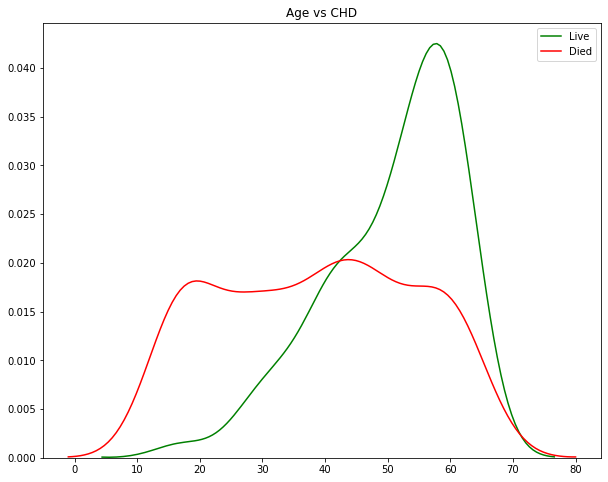

In [10]:

import seaborn as sns
import matplotlib.pyplot as plt

# Splitting data into those that are alive and dead for age
# Creating mask of True values to pull from dataframe for either category
age_alive = heart_train_df.age[heart_train_df["chd"] == 1]
age_dead = heart_train_df.age[heart_train_df["chd"] == 0]

# Using kdeplot from seaborns
plt.figure(figsize=(10,8))
# Kdeplot plots the probability distribution of a given dataset
sns.kdeplot(age_alive, color="green")

sns.kdeplot(age_dead, color="red")
plt.legend(["Live", "Died"])
plt.title("Age vs CHD")
plt.show()

###### F) Find age groups whose survival rate is the largest

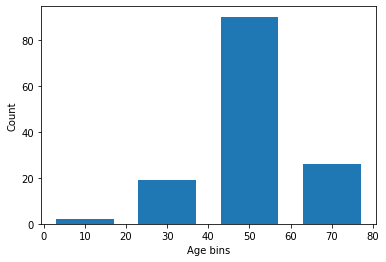

In [11]:

# Selecting bins to coincide with max age of 64
# Bins go from age ranges of [0-20) [20 - 40) [40 - 60) [60 - 80]
bins = [0, 20, 40, 60, 80]

# Using .hist function to create a histogram with the specified bin ranges and creating space between bins for easier reading
plt.hist(age_alive, bins=bins, rwidth=.7)
plt.xlabel('Age bins')
plt.ylabel("Count")
plt.show()


- Largest age group is between 40 and 60 years old

##### G) Find similar relationships for at least 3-4 columns that I think can play a role

- Looking at Tobacco first

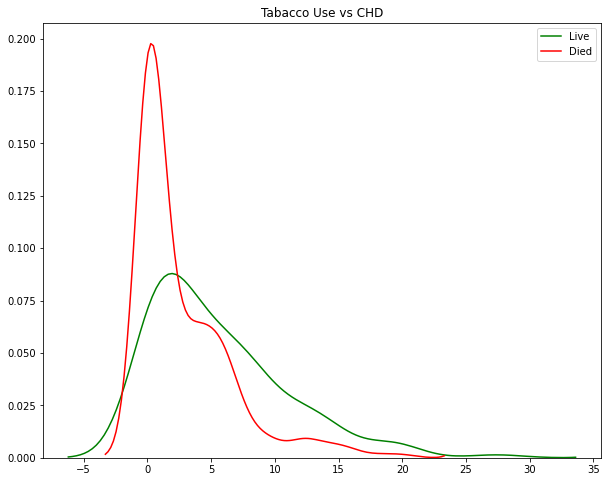

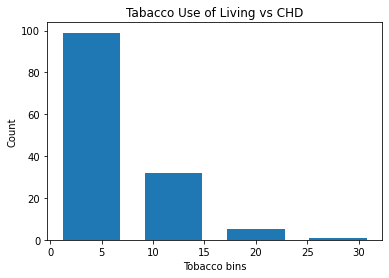

In [12]:

# Splitting data into those that are alive and dead
age_alive_tobacco = heart_train_df.tobacco[heart_train_df["chd"] == 1]
age_dead_tobacco = heart_train_df.tobacco[heart_train_df["chd"] == 0]

# Using kdeplot from seaborns
plt.figure(figsize=(10,8))

sns.kdeplot(age_alive_tobacco, color="green")

sns.kdeplot(age_dead_tobacco, color="red")
plt.legend(["Live", "Died"])
plt.title("Tabacco Use vs CHD")
plt.show()

# Getting bins of tobacco use
# Selecting bins to coincide with max tobacco use of 31.2

bins = [0, 8, 16, 24, 32]

plt.hist(age_alive_tobacco, bins=bins, rwidth=.7)
plt.xlabel('Tobacco bins')
plt.ylabel("Count")
plt.title("Tabacco Use of Living vs CHD")
plt.show()


###### G) Continued
- Looking at ldl

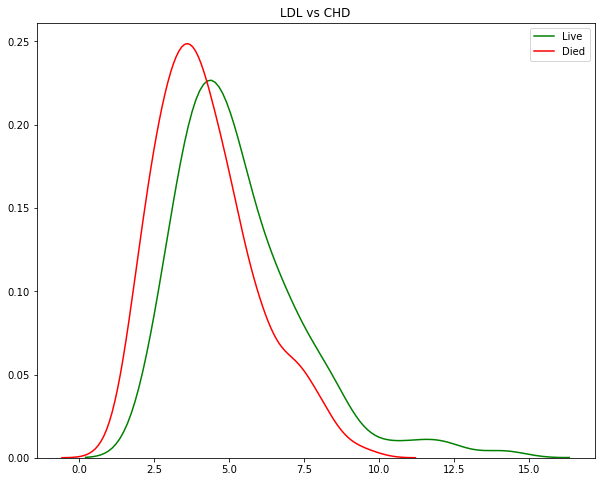

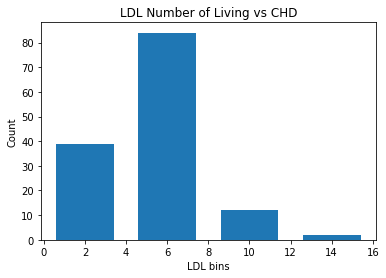

In [13]:

# Splitting data into those that are alive and dead
age_alive_ldl = heart_train_df.ldl[heart_train_df["chd"] == 1]
age_dead_ldl = heart_train_df.ldl[heart_train_df["chd"] == 0]

# Using kdeplot from seaborns
plt.figure(figsize=(10,8))

sns.kdeplot(age_alive_ldl, color="green")

sns.kdeplot(age_dead_ldl, color="red")
plt.legend(["Live", "Died"])
plt.title("LDL vs CHD")
plt.show()

# Getting bins of ldl use
# Selecting bins to coincide with max LDL use of 15.3

bins = [0, 4, 8, 12, 16]

plt.hist(age_alive_ldl, bins=bins, rwidth=.7)
plt.xlabel('LDL bins')
plt.ylabel("Count")
plt.title("LDL Number of Living vs CHD")
plt.show()
# LDL seems to have a smaller relationship to alive or dead. Both closely related.

- Looking at sbp

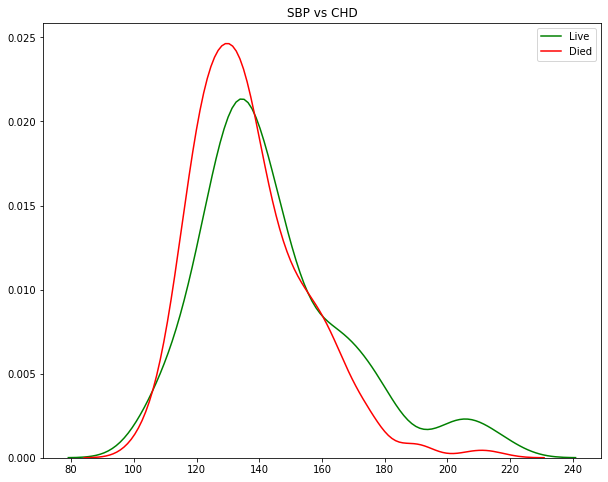

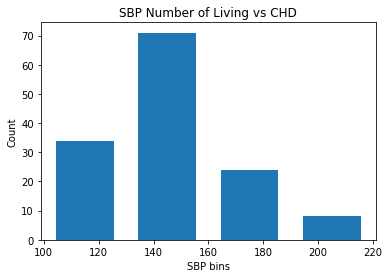

In [14]:

# Splitting data into those that are alive and dead
age_alive_sbp = heart_train_df.sbp[heart_train_df["chd"] == 1]
age_dead_sbp = heart_train_df.sbp[heart_train_df["chd"] == 0]

# Using kdeplot from seaborns
plt.figure(figsize=(10,8))

sns.kdeplot(age_alive_sbp, color="green")

sns.kdeplot(age_dead_sbp, color="red")
plt.legend(["Live", "Died"])
plt.title("SBP vs CHD")
plt.show()

# Getting bins of SBP use
# Selecting bins to coincide with max sbp of 218

bins = [100, 130, 160, 190, 220]

plt.hist(age_alive_sbp, bins=bins, rwidth=.7)
plt.xlabel('SBP bins')
plt.ylabel("Count")
plt.title("SBP Number of Living vs CHD")
plt.show()
# Doesn't seem to be that big of a relationship here but still there is something to go off of.

- Looking at adiposity

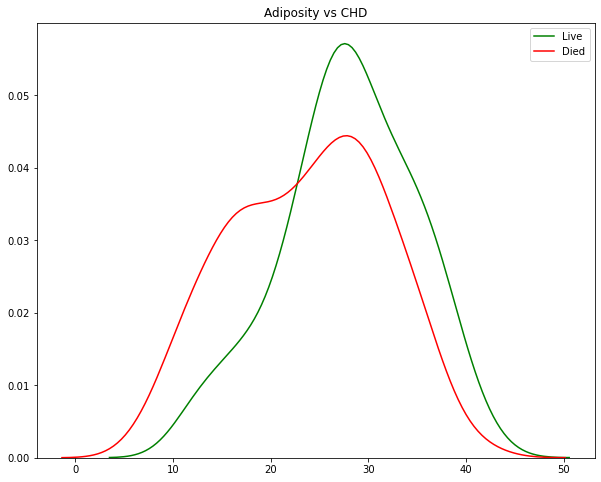

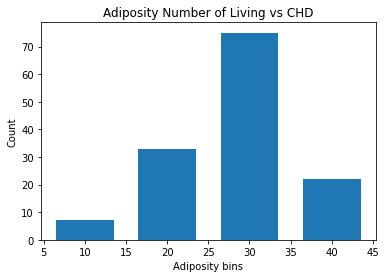

In [15]:

# Splitting data into those that are alive and dead
age_alive_adiposity = heart_train_df.adiposity[heart_train_df["chd"] == 1]
age_dead_adiposity = heart_train_df.adiposity[heart_train_df["chd"] == 0]

# Using kdeplot from seaborns
plt.figure(figsize=(10,8))

sns.kdeplot(age_alive_adiposity, color="green")

sns.kdeplot(age_dead_adiposity, color="red")
plt.legend(["Live", "Died"])
plt.title("Adiposity vs CHD")
plt.show()

# Getting bins of adiposity use
# Selecting bins to coincide with max adiposity of 42.49

bins = [5, 15, 25, 35, 45]

plt.hist(age_alive_adiposity, bins=bins, rwidth=.7)
plt.xlabel('Adiposity bins')
plt.ylabel("Count")
plt.title("Adiposity Number of Living vs CHD")
plt.show()
# Smaller relationship but still a difference between the alive and dead to be considered worthwhile checking out

#### H. Get more visuals on data distributions
- i) Use plotCorrelationMatrix

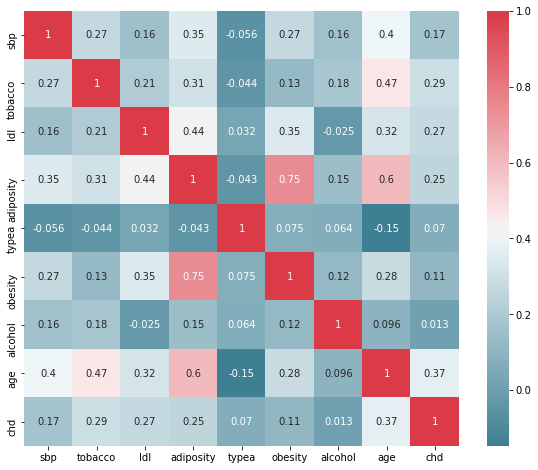

In [16]:

# Creating figure and axis
fig, ax = plt.subplots(figsize=(10,8))
# Plotting correlation matrix as a heatmap for better visualization of results
sns.heatmap(heart_train_df.corr(), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax, annot=True)
plt.show()

- ii) Plotting scatter matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015FB35FB250>,
      dtype=object)

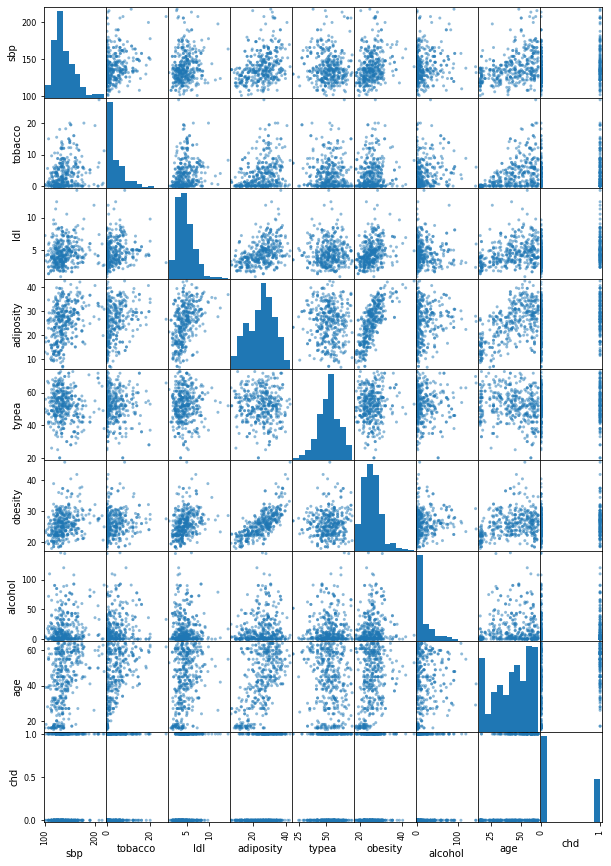

In [17]:

# Using built-in Pandas function

pd.plotting.scatter_matrix(heart_train_df, figsize=(10,15))

- iii) Plot per column distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015FB4A0BB80>,
      dtype=object)

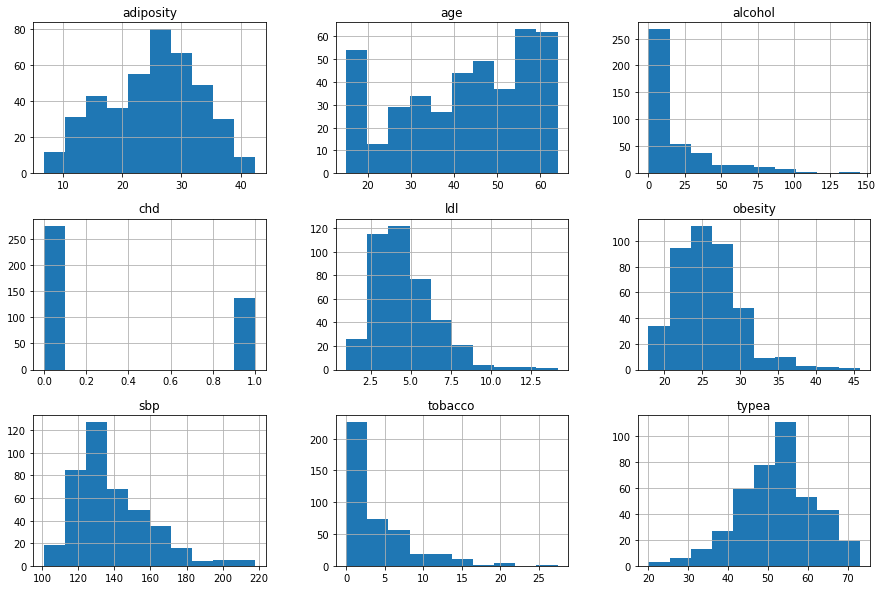

In [18]:

heart_train_df.hist(figsize=(15,10))

#### I. Find missing values
- i) Get the count of missing values

In [19]:

# Getting total missing values 'NaN' from all columns and getting sum of each column's number
print("Total missing values in DF: ", heart_train_df.isnull().sum().sum())

Total missing values in DF:  0


- ii) Plot a heat map for the missing values <br />
There are no missing values so no heatmap can be plotted

#### J. Apply techniques to handle missing values
Since there are no missing values in the dataset, imputation on the dataset is not needed

#### K. Apply the feature scaling technique if I think it is required
- Will try to do min-max normalization at last bit (to not throw off results) <br />
- Refer to section towards end labeled <u>Start Logistic with MinMax Scaling</u>

#### L. Applying the regression models that I think is most suited for this problem.

In [20]:
# Splitting training data into features and target
x_train = heart_train_df.iloc[:,0:9]
y_train = heart_train_df.iloc[:,9]

# Also splitting testing data into features and target
x_test = heart_test_df.iloc[:,1:]

# Creating separate split since need to modify test data
x_test_reg = heart_test_df.iloc[:,1:]


##### First attempt will be Logistic Regression

In [21]:
# import logistic regression library and preprocessing to get data into needed format for regression model
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing


# Need to do column preprocessing so that can use model
# Converting column to String so that can perform label encoding
x_train["famhist"] = x_train["famhist"].astype(str)
x_test_reg["famhist"] = x_test_reg["famhist"].astype(str)

# Doing label encoding so that model can have its float values

# Creating label encoding object
label_encoder = preprocessing.LabelEncoder()

# Selecting column to be transformed
famhist_data = x_train["famhist"]
famhist_test_data = x_test_reg["famhist"]

# Fitting and transforming string values to unique ints based on their current value
famhist_trans = label_encoder.fit_transform(famhist_data)
famhist_test_trans = label_encoder.fit_transform(famhist_test_data)

# Adding transformed array in place of original data
x_train["famhist"] = famhist_trans
x_test_reg["famhist"] = famhist_test_trans

# Creating logistic regression object with max iterations to converge to target gradient set to 1000
logistic = LogisticRegression(max_iter=1000)

logistic.fit(x_train, y_train)

y_predict = logistic.predict(x_test_reg)

#### Getting results formatted and saving to csv for kaggle

In [22]:
import numpy as np

array_ID = np.arange(1,144)
data = {'ID' : array_ID, 'chd' : y_predict}

reg_df = pd.DataFrame(data=data)
reg_df.to_csv('regression_model.csv', index=False)

### Model SVM

In [23]:
from sklearn import svm
import sklearn.metrics as metric
%matplotlib inline

In [24]:
#Defining kernel
# Choosing linear kernel meaning that we will not be mapping features to a higher level dimensional space to maximize
# margin hyperplanes
svc = svm.SVC(kernel='linear')
# Training model on training data
svc.fit(x_train,y_train)


SVC(kernel='linear')

In [25]:
# Running prediction on the model
# Note that using test data that has been standardized like previous model
y_predict = svc.predict(x_test_reg)
y_predict

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [26]:
# Saving model predictions to csv for Kaggle upload
array_ID = np.arange(1,144)
data = {'ID' : array_ID, 'chd' : y_predict}

svm_df = pd.DataFrame(data=data)
svm_df.to_csv('svm_model.csv', index=False)

### End Model SVM

### Start Decision Tree

In [27]:
from sklearn import tree

# Making a decision tree object with default values for purining strategies and splitting criterion (gini index)
d_tree = tree.DecisionTreeClassifier()
# Training model on same testing data as above
d_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [28]:
# Running prediction on the model
# Note that using test data that has been standardized like previous model
y_predict = d_tree.predict(x_test_reg)
y_predict

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [29]:
# Saving predictions as csv for Kaggle upload
array_ID = np.arange(1,144)
data = {'ID' : array_ID, 'chd' : y_predict}

dtree_df = pd.DataFrame(data=data)
dtree_df.to_csv('decision_tree_model.csv', index=False)

### End Decision Tree

### Start Ridge Classifier

In [30]:
from sklearn.linear_model import RidgeClassifier
# Creating ridge classifier object with default parameter settings
ridge_model = RidgeClassifier()

ridge_model.fit(x_train, y_train)

RidgeClassifier()

In [31]:
# Running prediction on the model
# Note that using test data that has been standardized like previous model
y_predict = d_tree.predict(x_test_reg)
y_predict

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [32]:
# Saving predictions as csv for Kaggle upload
array_ID = np.arange(1,144)
data = {'ID' : array_ID, 'chd' : y_predict}

ridge_df = pd.DataFrame(data=data)
ridge_df.to_csv('ridge_classifier_model.csv', index=False)

### End Ridge Classifier

### Start Logistic with MinMax Scaling <br />
- From part 4.K. Seeing if Scaling can help in producing better results

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler_mm = MinMaxScaler()

x_train_scale_mm = scaler_mm.fit_transform(x_train)
x_test_scale_mm = scaler_mm.transform(x_test_reg)

# Creating logistic regression object with maximum number of iterations set to 1000 so that model can complete its training
logistic_scaler_mm = LogisticRegression(max_iter=1000)

logistic_scaler_mm.fit(x_train_scale_mm, y_train)

y_predict = logistic_scaler_mm.predict(x_test_scale_mm)

In [34]:
# Saving predictions as csv for Kaggle upload
array_ID = np.arange(1,144)
data = {'ID' : array_ID, 'chd' : y_predict}

log_mm_df = pd.DataFrame(data=data)
log_mm_df.to_csv('logistic_regression_scaled_features_model.csv', index=False)

#### End Logistic MinMax Scaling

### M. One model used is implementation using NumPy

#### Binary Classification using NN implemented by PyTorch

In [35]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn                                   # neural networks module of PyTorch, to let us define neural network layers
from torch.nn import functional as F                    # special functions
import torch.optim as optim                             # optimizers

## train data
# Defining train and test set type objects so that they can be used with the torch dataloader function
# Specifying how data will be interpreted when loaded into class as a torch floatTensor object
class trainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data = trainData(torch.FloatTensor(x_train.values), 
                       torch.FloatTensor(y_train.values))
## test data    
class testData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = testData(torch.FloatTensor(x_test_reg.values))

In [36]:
# Using the dataloader class to create training and test loaders that will be loaded into the created model
# Batch_size indicates the number of samples contained in each generated batch
# shuffle=True means that the ordering of batches will change at each pass
train_loader = DataLoader(dataset=train_data, batch_size=5, shuffle=True)

test_loader = DataLoader(dataset=test_data, batch_size=1)

In [37]:
class binaryClassification(nn.Module):
    def __init__(self):
        super(binaryClassification, self).__init__()
        # Number of input features is 9.
        # Defining the three layers that I will be using for this model (Input, hidden and output)
        # First layer takes in 9 inputs (the 9 features) and outputs 64 variables
        # Second layer takes in 64 variables and outputs 64
        # The final layer will take in 64 variables and output a single number (estimation)
        self.layer_1 = nn.Linear(9, 64) 
        self.layer_2 = nn.Linear(64, 64)
        self.layer_out = nn.Linear(64, 1) 
        # Using the Rectified linear unit function so that layers will map values from 0 to positive values
        self.relu = nn.ReLU()
        # Creating a dropout probability function so that we do not overfit the data. Probability of a sample going to 0 is P=0.1
        self.dropout = nn.Dropout(p=0.1)
        # Creating batch normalization objects of 1D arrays so that outputs of layers will be normalized before being inputted
        # to the next layer
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(64)
    # Defining what the forward propagation function will do in this model   
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

In [38]:
# Attempting to discover GPU so that we can run model on it, else use the cpu for computation
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = binaryClassification()
model.to(device)
print(model)
# Loss function is combination of a Sigmoid layer and the BCELoss in one class
# This will ensure a 0,1 output mapping of values without having to first go through a sigmoid function
# and then the BCELoss function.
# At it's core, BCELoss measures the binary cross entropy between the target and the output, thus allowing backpropagation to 
# occur 
criterion = nn.BCEWithLogitsLoss()
# For my optimizer function, I chose Adam (Adaptive Momemt Estimation). I could have also used SGD (Stochastic gradient descent)
optimizer = optim.Adam(model.parameters(), lr=.001)

binaryClassification(
  (layer_1): Linear(in_features=9, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [39]:
# Defining an accuracy measurement per epoch so as to track results
def binary_acc(y_pred, y_test):
    # Rounding out prediction to nearest whole number (0,1) after running the predicted output through the sigmoid function
    y_pred_tag = torch.round(torch.sigmoid(y_pred))
    # Adding up correct samples out of all predicted values
    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [40]:
# Running the training of model. Dropout will be used during training as specified in model.train() implementation
model.train()
# Running an epoch training of 50 runs
for e in range(1, 50+1):
    epoch_loss = 0
    epoch_acc = 0
    # For training batches that I have created from dataloader function
    for X_batch, y_batch in train_loader:
        # Loading both batches to device (in this case the cpu)
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        # Zeroing out the optimizer gradients for this run so that fresh optimization on network can take place
        # Otherwise gradients will accumulate per pass
        optimizer.zero_grad()
        # Predicting label based on training samples
        y_pred = model(X_batch)
        # Determining entropy loss of predicted to actual values based on criteria defined above
        # Unsqueezing data so that we can compare to original test data (putting back dimension with length of 1)
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        # Determining accuracy of run with defined function above
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        # Performing back-propagation with the calculated loss function cross-entropy, which will update each neuron
        loss.backward()
        # Optimizing each variable to minimize their loss by finding the gradient of each
        optimizer.step()
        # Saving the loss value as float to determine model training performance as time goes on
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        

    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

Epoch 001: | Loss: 0.66117 | Acc: 61.446
Epoch 002: | Loss: 0.64267 | Acc: 62.530
Epoch 003: | Loss: 0.61758 | Acc: 66.988
Epoch 004: | Loss: 0.60959 | Acc: 65.301
Epoch 005: | Loss: 0.56946 | Acc: 70.361
Epoch 006: | Loss: 0.58250 | Acc: 70.964
Epoch 007: | Loss: 0.53942 | Acc: 74.458
Epoch 008: | Loss: 0.54335 | Acc: 70.361
Epoch 009: | Loss: 0.56584 | Acc: 70.120
Epoch 010: | Loss: 0.53788 | Acc: 71.325
Epoch 011: | Loss: 0.53814 | Acc: 69.880
Epoch 012: | Loss: 0.56755 | Acc: 70.723
Epoch 013: | Loss: 0.55039 | Acc: 70.964
Epoch 014: | Loss: 0.55196 | Acc: 70.000
Epoch 015: | Loss: 0.54031 | Acc: 72.892
Epoch 016: | Loss: 0.52377 | Acc: 74.819
Epoch 017: | Loss: 0.55279 | Acc: 72.289
Epoch 018: | Loss: 0.52757 | Acc: 74.217
Epoch 019: | Loss: 0.53309 | Acc: 71.084
Epoch 020: | Loss: 0.56139 | Acc: 70.843
Epoch 021: | Loss: 0.52625 | Acc: 76.145
Epoch 022: | Loss: 0.53735 | Acc: 73.855
Epoch 023: | Loss: 0.53952 | Acc: 71.325
Epoch 024: | Loss: 0.57054 | Acc: 71.325
Epoch 025: | Los

In [41]:
y_pred_list = []
# Testing model by running model.eval which will not make use of dropout as specified in documentation
model.eval()
# Setting No gradient flags since we are no longer training
with torch.no_grad():
    # For the testing batches that were loaded in
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        # Running predictions through sigmoid function to get probability results
        y_test_pred = torch.sigmoid(y_test_pred)
        # Rounding probabilities to nearest whole number (0,1)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [42]:
y_pred_list = [ int(x) for x in y_pred_list ]

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_predict, y_pred_list)

array([[111,   5],
       [  9,  18]], dtype=int64)

In [44]:
# Saving predictions to csv for Kaggle
rray_ID = np.arange(1,144)
data = {'ID' : array_ID, 'chd' : y_pred_list}

pyTorch_df = pd.DataFrame(data=data)
pyTorch_df.to_csv('pytorch_model.csv', index=False)


# Credit to https://towardsdatascience.com/pytorch-tabular-binary-classification-a0368da5bb89

### End Test Binary Classify